# Tasks Solution

Before you begin, please ensure you enable GPU hardware acceleration to optimize your performance. This can be done by navigating to "Edit" > "Notebook settings" and selecting "GPU" as the hardware accelerator.

In [10]:
import sys
import os


if 'google.colab' in sys.modules:
  repo_url = 'https://github.com/c3di/im2im_evaluation.git'
  !git clone {repo_url}
  repo_dir = repo_url.split('/')[-1].split('.git')[0]
  os.chdir(repo_dir)
else:
  os.chdir('../../')

In [11]:
import numpy as np
import torch
import tensorflow as tf
import skimage.io as skio
import cv2
from PIL import Image
from torchvision.transforms import functional as F
from src.test_util import test_conversion_functions

c:\Users\luwa02\AppData\Local\anaconda3\envs\jupyter\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] The specified procedure could not be found'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
c:\Users\luwa02\AppData\Local\anaconda3\envs\jupyter\lib\site-packages\torchvision\datapoints\__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect m

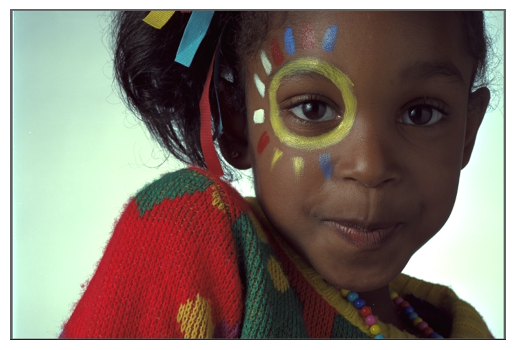

In [12]:
import matplotlib.pyplot as plt
from src.get_image_data import test_image

def im_show(image):
  plt.imshow(image)
  plt.axis('off')
  plt.show()

im_show(test_image)

## Task Set 1 Step Conversion

In [16]:
def scikit_rgb_to_opencv_bgr(image):
    scikit_rgb = np.asarray(image)
    
    scikit_bgr = scikit_rgb[:, :, ::-1]
    
    opencv_bgr = np.asarray(scikit_bgr)
    return opencv_bgr

In [6]:
def numpy_channelfirst_to_channellast(image):
    np_channelfirst = np.asarray(image)
    
    np_channellast = np.transpose(np_channelfirst, (1, 2, 0))
    
    return np_channellast

In [1]:
def tf_batched_to_unbatched(image):
    tf_batched = tf.constant(image)
    
    tf_unbatched = tf.squeeze(tf_batched, 0)
    
    return  tf_unbatched 


In [2]:
def torch_gpu_to_cpu(image):
    torch_gpu = torch.tensor(image)
    
    torch_cpu = torch_gpu.cpu()
    
    return torch_cpu

In [3]:
def pil_to_tf(image):
    img_pil = Image.open(image)
    
    img_tf = tf.convert_to_tensor(img_pil)
    
    return img_tf

In [18]:
# run tests
tests_config = [
    ({"data_representation": "numpy.ndarray", "color_channel": 'rgb', "channel_order": 'channel first',
      "minibatch_input": False, "image_data_type": 'uint8', "device": 'cpu'},
     {"data_representation": "numpy.ndarray", "color_channel": 'bgr', "channel_order": 'channel first',
      "minibatch_input": False, "image_data_type": 'uint8', "device": 'cpu'}, 
     scikit_rgb_to_opencv_bgr),

    ({"data_representation": "numpy.ndarray", "color_channel": 'rgb', "channel_order": 'channel first',
      "minibatch_input": False, "image_data_type": 'uint8', "device": 'cpu'},
     {"data_representation": "numpy.ndarray", "color_channel": 'rgb', "channel_order": 'channel last',
      "minibatch_input": False, "image_data_type": 'uint8', "device": 'cpu'},
     numpy_channelfirst_to_channellast),

    ({"data_representation": "tf.tensor", "color_channel": 'rgb', "channel_order": 'channel last',
      "minibatch_input": True, "image_data_type": 'uint8', "device": 'cpu'},
     {"data_representation": "tf.tensor", "color_channel": 'rgb', "channel_order": 'channel last',
      "minibatch_input": False, "image_data_type": 'uint8', "device": 'cpu'},
     tf_batched_to_unbatched),

    ({"data_representation": "torch.tensor", "color_channel": 'rgb', "channel_order": 'channel first',
      "minibatch_input": False, "image_data_type": 'uint8', "device": 'gpu'},
     {"data_representation": "torch.tensor", "color_channel": 'rgb', "channel_order": 'channel first',
      "minibatch_input": False, "image_data_type": 'uint8', "device": 'cpu'},
     torch_gpu_to_cpu),

    ({"data_representation": "PIL.Image", "color_channel": 'rgb', "channel_order": 'channel last',
      "minibatch_input": False, "image_data_type": 'uint8', "device": 'cpu'},
     {"data_representation": "tf.tensor", "color_channel": 'rgb', "channel_order": 'channel last',
      "minibatch_input": False, "image_data_type": 'uint8', "device": 'cpu'},
     pil_to_tf)]

test_conversion_functions(tests_config)

[[[ 99  99  99 ...  99  99  99]
  [ 99  99  99 ...  99  99  99]
  [ 99  99  99 ...  95  99  99]
  ...
  [ 99  99 100 ...  79 100  99]
  [ 99  99  99 ... 100  99  99]
  [  0   0   0 ...   0   0   0]]

 [[ 99  99  99 ...  99  99  99]
  [ 99  99  99 ...  99  99  99]
  [ 99  99  99 ...  98  99  99]
  ...
  [ 99  99 100 ...  84 100  99]
  [ 99  99  99 ... 100  99  99]
  [  0   0   0 ...   0   0   0]]

 [[ 99  99  99 ...  99  99  99]
  [ 99  99  99 ...  99  99  99]
  [ 99  99  99 ...  97  99  99]
  ...
  [ 99  99 100 ...  82 100  99]
  [ 99  99  99 ... 100  99  99]
  [  0   0   0 ...   0   0   0]]]
[[[ 99  99  99 ...  99  99  99]
  [ 99  99  99 ...  99  99  99]
  [ 99  99  99 ...  95  99  99]
  ...
  [ 99  99 100 ...  79 100  99]
  [ 99  99  99 ... 100  99  99]
  [  0   0   0 ...   0   0   0]]

 [[ 99  99  99 ...  99  99  99]
  [ 99  99  99 ...  99  99  99]
  [ 99  99  99 ...  98  99  99]
  ...
  [ 99  99 100 ...  84 100  99]
  [ 99  99  99 ... 100  99  99]
  [  0   0   0 ...   0   0   0]]



AttributeError: module 'torchvision.transforms.v2.functional' has no attribute 'to_dtype'

## Task Set Two Steps Convertion

In [19]:
def torch_uint8_to_float0to1(image):
    torch_uint8 = torch.tensor(image)
    
    torch_floatfull = torch_uint8.float()
    torch_float0to1 = torch_floatfull / 255.0
    
    return torch_float0to1

In [20]:
def numpy_channelfirst_float0to1_rgb_unbatched_to_gray_batched(image):
    np_channelfirst_float0to1_rgb_unbatched = np.asarray(image)
    
    weight = np.array([0.299, 0.587, 0.114]).reshape(3, 1, 1)
    np_gray_unbatched = np.sum(np_channelfirst_float0to1_rgb_unbatched * weight, axis=0, keepdims=True)
    np_gray_batched = np_gray_unbatched[np.newaxis, ...]

    return np_gray_batched

In [21]:
def numpy_float0to1_to_uint8(image):
    np_float0to1 = np.asarray(image)
    
    np_floatfull = np_float0to1 * 255
    np_uint8 = np_floatfull.astype(np.uint8)
    
    return np_uint8

In [22]:
def tf_rgb_to_gray_nonchannel(image):
    tf_rgb = tf.constant(image)
    
    tf_gray = tf.image.rgb_to_grayscale(tf_rgb)
    tf_gray_nonchannel = tf.squeeze(tf_gray, -1)
    
    return tf_gray_nonchannel

In [23]:
def tf_nonechannel_float32_to_channellast_float64(image):
    tf_nonechannel_float32 = tf.constant(image)
    
    tf_nonechannel_float64 = tf.image.convert_image_dtype(tf_nonechannel_float32, tf.float64)
    tf_channellast_float64 = tf.expand_dims(tf_nonechannel_float64, -1)
    
    return tf_channellast_float64

In [24]:
def torch_channelfirst_unbatched_to_channellast_batched(image):
    torch_channelfirst_unbatched = torch.tensor(image)
    
    torch_channellast_unbatched = torch_channelfirst_unbatched.permute(1, 2, 0)
    torch_channellast_batched = torch_channellast_unbatched.unsqueeze(0)
    
    return torch_channellast_batched

In [25]:
def torch_batched_cpu_to_unbatched_gpu(image):
    torch_batched_cpu = torch.tensor(image)
    
    torch_unbatched_cpu = torch_batched_cpu.squeeze(0)
    torch_unbatched_gpu = torch_unbatched_cpu.cuda()
    
    return torch_unbatched_gpu

In [26]:
def numpy_gray_to_pil_rgb(image):
    np_gray = np.asarray(image)
    
    np_rgb = np.stack([np_gray]*3, axis=-1)
    pil_rgb = Image.fromarray(np_rgb)
    
    return pil_rgb

In [27]:
# run tests
tests_config = [
    ({"data_representation": "torch.tensor", "color_channel": 'rgb', "channel_order": 'channel first',
      "minibatch_input": False, "image_data_type": 'uint8', "device": 'cpu'},
     {"data_representation": "torch.tensor", "color_channel": 'rgb', "channel_order": 'channel first',
      "minibatch_input": False, "image_data_type": 'float32(0to1)', "device": 'cpu'},
     torch_uint8_to_float0to1),
    
    ({"data_representation": "numpy.ndarray", "color_channel": 'rgb', "channel_order": 'channel first',
      "minibatch_input": False, "image_data_type": 'float32(0to1)', "device": 'cpu'},
     {"data_representation": "numpy.ndarray", "color_channel": 'gray', "channel_order": 'channel first',
      "minibatch_input": True, "image_data_type": 'float32(0to1)', "device": 'cpu'},
     numpy_channelfirst_float0to1_rgb_unbatched_to_gray_batched),
    
    ({"data_representation": "numpy.ndarray", "color_channel": 'rgb', "channel_order": 'channel first',
      "minibatch_input": False, "image_data_type": 'float32(0to1)', "device": 'cpu'},
     {"data_representation": "numpy.ndarray", "color_channel": 'rgb', "channel_order": 'channel first',
      "minibatch_input": False, "image_data_type": 'uint8', "device": 'cpu'},
     numpy_float0to1_to_uint8),

    ({"data_representation": "tf.tensor", "color_channel": 'rgb', "channel_order": 'channel last',
      "minibatch_input": False, "image_data_type": 'uint8', "device": 'cpu'},
     {"data_representation": "tf.tensor", "color_channel": 'gray', "channel_order": 'none',
      "minibatch_input": False, "image_data_type": 'uint8', "device": 'cpu'},
     tf_rgb_to_gray_nonchannel),

    ({"data_representation": "tf.tensor", "color_channel": 'gray', "channel_order": 'none',
      "minibatch_input": False, "image_data_type": 'float32(0to1)', "device": 'cpu'},
     {"data_representation": "tf.tensor", "color_channel": 'gray', "channel_order": 'channel last',
      "minibatch_input": False, "image_data_type": 'float64(0to1)', "device": 'cpu'},
     tf_nonechannel_float32_to_channellast_float64),

    ({"data_representation": "torch.tensor", "color_channel": 'rgb', "channel_order": 'channel first',
      "minibatch_input": False, "image_data_type": 'uint8', "device": 'cpu'},
     {"data_representation": "torch.tensor", "color_channel": 'rgb', "channel_order": 'channel last',
      "minibatch_input": True, "image_data_type": 'uint8', "device": 'cpu'},
     torch_channelfirst_unbatched_to_channellast_batched),

    ({"data_representation": "torch.tensor", "color_channel": 'rgb', "channel_order": 'channel first',
      "minibatch_input": True, "image_data_type": 'float32(0to1)', "device": 'cpu'},
     {"data_representation": "torch.tensor", "color_channel": 'rgb', "channel_order": 'channel first',
      "minibatch_input": False, "image_data_type": 'float32(0to1)', "device": 'gpu'},
     torch_batched_cpu_to_unbatched_gpu),

    ({"data_representation": "numpy.ndarray", "color_channel": 'gray', "channel_order": 'channel last',
      "minibatch_input": False, "image_data_type": 'uint8', "device": 'cpu'},
     {"data_representation": "PIL.Image", "color_channel": 'rgb', "channel_order": 'channel last',
      "minibatch_input": False, "image_data_type": 'uint8', "device": 'cpu'},
     numpy_gray_to_pil_rgb),
]

test_conversion_functions(tests_config)

AttributeError: module 'torchvision.transforms.v2.functional' has no attribute 'to_dtype'

## Task Set Three Steps Conversion

In [28]:
def numpy_bgr_uint8_to_rgb_float0to1(image):
    np_bgr_uint8 = np.asarray(image)
    
    np_bgr_floatfull = np_bgr_uint8.astype(np.float32)
    np_bgr_float0to1 = np_bgr_floatfull / 255
    np_rgb_float0to1 = np_bgr_float0to1[..., ::-1]

    return np_rgb_float0to1
    

In [29]:
def tf_rgb_channelfirst_batched_to_gray_channellast_unbatched(image):
    tf_rgb_channelfirst_batched = tf.constant(image)
    
    tf_rgb_chennelfirst_unbatched = tf.squeeze(tf_rgb_channelfirst_batched, 0)
    tf_rgb_channellast_unbatched = tf.transpose(tf_rgb_chennelfirst_unbatched, [1, 2, 0])
    tf_gray_channellast_unbatched = tf.image.rgb_to_grayscale(tf_rgb_channellast_unbatched)
    
    return tf_gray_channellast_unbatched

In [31]:
def tf_gray_uint8_nonechannel_to_rgb_float32_channellast(image):
    tf_gray_uint8_nonechannel = tf.constant(image)
    
    tf_gray_float32_nonechannel = tf.image.convert_image_dtype(tf_gray_uint8_nonechannel, tf.float32)
    tf_gray_float32_channellast = tf.expand_dims(tf_gray_float32_nonechannel, -1)
    tf_rgb_float32_channellast = tf.image.grayscale_to_rgb(tf_gray_float32_channellast)

    return tf_rgb_float32_channellast

In [32]:
def torch_channelfirst_float32_to_channellast_uint8(image):
    torch_channelfirst_float32 = torch.tensor(image)
    
    torch_channelfirst_floatfull = torch_channelfirst_float32 * 255
    torch_channelfirst_uint8 = torch_channelfirst_floatfull.to(torch.uint8)
    torch_channellast_uint8 = torch_channelfirst_uint8.permute(1, 2, 0)
    
    return torch_channellast_uint8

In [33]:
def torch_rgb_gpu_to_numpy_gray_cpu(image):
    torch_rgb_gpu = torch.tensor(image)
    
    torch_rgb_cpu = torch_rgb_gpu.cpu()
    torch_gray_cpu = F.rgb_to_grayscale(torch_rgb_cpu)
    numpy_gray_cpu = torch_gray_cpu.numpy(force=True)
    
    return numpy_gray_cpu

In [34]:
# run tests
tests_config = [
    ({"data_representation": "numpy.ndarray", "color_channel": 'bgr', "channel_order": 'channel first',
      "minibatch_input": False, "image_data_type": 'float32(0to1)', "device": 'cpu'},
     {"data_representation": "numpy.ndarray", "color_channel": 'rgb', "channel_order": 'channel first',
      "minibatch_input": False, "image_data_type": 'uint8', "device": 'cpu'},
     numpy_bgr_uint8_to_rgb_float0to1),

    ({"data_representation": "tf.tensor", "color_channel": 'rgb', "channel_order": 'channel first',
      "minibatch_input": True, "image_data_type": 'uint8', "device": 'cpu'},
     {"data_representation": "tf.tensor", "color_channel": 'gray', "channel_order": 'channel last',
      "minibatch_input": False, "image_data_type": 'uint8', "device": 'cpu'},
     tf_rgb_channelfirst_batched_to_gray_channellast_unbatched),

    ({"data_representation": "tf.tensor", "color_channel": 'gray', "channel_order": 'none',
      "minibatch_input": False, "image_data_type": 'uint8', "device": 'cpu'},
     {"data_representation": "tf.tensor", "color_channel": 'rgb', "channel_order": 'channel last',
      "minibatch_input": False, "image_data_type": 'float32(0to1)', "device": 'cpu'}, 
     tf_gray_uint8_nonechannel_to_rgb_float32_channellast),

    ({"data_representation": "torch.tensor", "color_channel": 'rgb', "channel_order": 'channel first',
      "minibatch_input": False, "image_data_type": 'float32(0to1)', "device": 'cpu'},
     {"data_representation": "torch.tensor", "color_channel": 'rgb', "channel_order": 'channel last',
      "minibatch_input": False, "image_data_type": 'uint8', "device": 'cpu'},
     torch_channelfirst_float32_to_channellast_uint8),

    ({"data_representation": "torch.tensor", "color_channel": 'rgb', "channel_order": 'channel first',
      "minibatch_input": False, "image_data_type": 'uint8', "device": 'gpu'},
     {"data_representation": "numpy.ndarray", "color_channel": 'gray', "channel_order": 'channel first',
      "minibatch_input": False, "image_data_type": 'uint8', "device": 'cpu'},
     torch_rgb_gpu_to_numpy_gray_cpu),
]

test_conversion_functions(tests_config)

[[[0.38823533 0.38823533 0.38823533 ... 0.38823533 0.38823533 0.38823533]
  [0.38823533 0.38823533 0.38823533 ... 0.38823533 0.38823533 0.38823533]
  [0.38823533 0.38823533 0.38823533 ... 0.3803922  0.38823533 0.38823533]
  ...
  [0.38823533 0.38823533 0.3921569  ... 0.32156864 0.3921569  0.38823533]
  [0.38823533 0.38823533 0.38823533 ... 0.3921569  0.38823533 0.38823533]
  [0.         0.         0.         ... 0.         0.         0.        ]]

 [[0.38823533 0.38823533 0.38823533 ... 0.38823533 0.38823533 0.38823533]
  [0.38823533 0.38823533 0.38823533 ... 0.38823533 0.38823533 0.38823533]
  [0.38823533 0.38823533 0.38823533 ... 0.38431376 0.38823533 0.38823533]
  ...
  [0.38823533 0.38823533 0.3921569  ... 0.32941177 0.3921569  0.38823533]
  [0.38823533 0.38823533 0.38823533 ... 0.3921569  0.38823533 0.38823533]
  [0.         0.         0.         ... 0.         0.         0.        ]]

 [[0.38823533 0.38823533 0.38823533 ... 0.38823533 0.38823533 0.38823533]
  [0.38823533 0.388235

AttributeError: module 'torchvision.transforms.v2.functional' has no attribute 'to_dtype'

## Task Set Four Steps Conversion

In [25]:
def numpy_rgb_channelfirst_batched_float0to1_to_rgb_channellast_unbatched_uint8(image):
    np_rgb_channelfirst_batched_float0to1 = np.asarray(image)
    
    np_rgb_channelfirst_unbatched_float0to1 = np.squeeze(np_rgb_channelfirst_batched_float0to1, 0)
    np_rgb_channellast_unbatched_float0to1 = np.transpose(np_rgb_channelfirst_unbatched_float0to1, (1, 2, 0))
    np_rgb_channellast_unbatched_floatfull = np_rgb_channellast_unbatched_float0to1 * 255
    np_rgb_channellast_unbatched_uint8 = np_rgb_channellast_unbatched_floatfull.astype(np.uint8)
    
    return np_rgb_channellast_unbatched_uint8

In [26]:
def tf_rgb_uint8_unbatched_channellast_to_gray_float32_batched_nonechannel(image):
    tf_rgb_uint8_unbatched_channellast = tf.constant(image)
    
    tf_gray_uint8_unbatched_channellast = tf.image.rgb_to_grayscale(tf_rgb_uint8_unbatched_channellast)
    tf_gray_float32_unbatched_channellast = tf.image.convert_image_dtype(tf_gray_uint8_unbatched_channellast, tf.float32)
    tf_gray_float32_unbatched_nonechannel = tf.squeeze(tf_gray_float32_unbatched_channellast, -1)
    tf_gray_float32_batched_nonechannel = tf.expand_dims(tf_gray_float32_unbatched_nonechannel, 0)
    
    return tf_gray_float32_batched_nonechannel

In [27]:
def tf_gray_float32_channellast_batched_to_rgb_channelfirst_unit8_unbatched(image):
    tf_gray_float32_channellast_batched = tf.constant(image)
    
    tf_gray_float32_channellast_unbatched = tf.squeeze(tf_gray_float32_channellast_batched, 0)
    tf_gray_float32_channelfirst_unbatched = tf.transpose(tf_gray_float32_channellast_unbatched, [2, 0, 1])
    tf_rgb_float32_channelfirst_unbatched = tf.image.grayscale_to_rgb(tf_gray_float32_channelfirst_unbatched)
    tf_rgb_channelfirst_uint8_unbatched = tf.image.convert_image_dtype(tf_rgb_float32_channelfirst_unbatched, tf.uint8)
    
    return tf_rgb_channelfirst_uint8_unbatched

In [28]:
def torch_rgb_uint8_batched_channelfirst_gpu_to_float_unbatched_channellast_cpu(image):
    torch_rgb_uint8_batched_channelfirst_gpu = torch.tensor(image)
    
    torch_rgb_uint8_batched_channelfirst_cpu = torch_rgb_uint8_batched_channelfirst_gpu.cpu()
    torch_rgb_floatfull_batched_channelfirst_cpu = torch_rgb_uint8_batched_channelfirst_cpu.float()
    torch_rgb_float_batched_channelfirst_cpu = torch_rgb_floatfull_batched_channelfirst_cpu / 255
    torch_rgb_float_unbatched_channelfirst_cpu = torch_rgb_float_batched_channelfirst_cpu.squeeze(0)
    torch_rgb_float_unbatched_channellast_cpu = torch_rgb_float_unbatched_channelfirst_cpu.permute(1, 2, 0)
    
    return torch_rgb_float_unbatched_channellast_cpu

In [29]:
def torch_rgb_channelfirst_batched_float_to_tf_gray_batched_channellast_float32(image):
    torch_rgb_channelfirst_batched_float = torch.tensor(image)
    
    torch_rgb_channellast_batched_float = torch_rgb_channelfirst_batched_float.permute(0, 2, 3, 1)
    np_rgb_channellast_batched_float0to1 = torch_rgb_channellast_batched_float.numpy()
    tf_rgb_channellast_batched_float32 = tf.convert_to_tensor(np_rgb_channellast_batched_float0to1)
    tf_gray_channellast_batched_float32 = tf.image.rgb_to_grayscale(tf_rgb_channellast_batched_float32)
    
    return tf_gray_channellast_batched_float32


In [30]:
# run tests
tests_config = [
    
    ({"data_representation": "numpy.ndarray", "color_channel": 'rgb', "channel_order": 'channel first',
      "minibatch_input": True, "image_data_type": 'float32(0to1)', "device": 'cpu'},
     {"data_representation": "numpy.ndarray", "color_channel": 'rgb', "channel_order": 'channel last',
      "minibatch_input": False, "image_data_type": 'uint8', "device": 'cpu'},
     numpy_rgb_channelfirst_batched_float0to1_to_rgb_channellast_unbatched_uint8),

    ({"data_representation": "tf.tensor", "color_channel": 'rgb', "channel_order": 'channel last',
      "minibatch_input": False, "image_data_type": 'uint8', "device": 'cpu'},
     {"data_representation": "tf.tensor", "color_channel": 'gray', "channel_order": 'none',
      "minibatch_input": True, "image_data_type": 'float32(0to1)', "device": 'cpu'},
     tf_rgb_uint8_unbatched_channellast_to_gray_float32_batched_nonechannel),

    ({"data_representation": "tf.tensor", "color_channel": 'gray', "channel_order": 'channel last',
      "minibatch_input": True, "image_data_type": 'float32(0to1)', "device": 'cpu'},
     {"data_representation": "tf.tensor", "color_channel": 'rgb', "channel_order": 'channel first',
      "minibatch_input": False, "image_data_type": 'uint8', "device": 'cpu'}, 
     tf_gray_float32_channellast_batched_to_rgb_channelfirst_unit8_unbatched),

    ({"data_representation": "torch.tensor", "color_channel": 'rgb', "channel_order": 'channel first',
      "minibatch_input": True, "image_data_type": 'uint8', "device": 'gpu'},
     {"data_representation": "torch.tensor", "color_channel": 'rgb', "channel_order": 'channel last',
      "minibatch_input": False, "image_data_type": 'float32(0to1)', "device": 'cpu'},
     torch_rgb_uint8_batched_channelfirst_gpu_to_float_unbatched_channellast_cpu),
    
    ({"data_representation": "torch.tensor", "color_channel": 'rgb', "channel_order": 'channel first',
      "minibatch_input": True, "image_data_type": 'float32(0to1)', "device": 'cpu'},
     {"data_representation": "tf.tensor", "color_channel": 'gray', "channel_order": 'channel last',
      "minibatch_input": True, "image_data_type": 'float32(0to1)', "device": 'cpu'},
     torch_rgb_channelfirst_batched_float_to_tf_gray_batched_channellast_float32),
]

test_conversion_functions(tests_config)


Passed/Total: 6/6


## Task Set More Steps Conversion

In [ ]:
def numpy_gray_nonechannel_unbatched_uint8_to_rgb_channelfirst_batched_float0to1(image):
    img_gray_nonechannel_unbatched_uint8 = np.asarray(image)
    

    img_rgb_nonechannel_unbatched_uint8 = np.stack([img_gray_nonechannel_unbatched_uint8]*3, axis=-1)
    img_rgb_nonechannel_unbatched_floatfull = img_rgb_nonechannel_unbatched_uint8.astype(np.float32)
    img_rgb_nonechannel_unbatched_float0to1 = img_rgb_nonechannel_unbatched_floatfull / 255
    img_rgb_channelfirst_unbatched_float0to1 = np.transpose(img_rgb_nonechannel_unbatched_float0to1, (2, 0, 1))
    img_rgb_channelfirst_batched_float0to1 = img_rgb_channelfirst_unbatched_float0to1[np.newaxis, ...]
    
    np_rgb_channelfirst_batched_float0to1 = np.asarray(img_rgb_channelfirst_batched_float0to1)
    return  np_rgb_channelfirst_batched_float0to1


In [31]:
def numpy_bgr_channelfirst_unbatched_uint8_to_tf_rgb_channellast_batched_float0to1(image):
    np_bgr_channelfirst_unbatched_uint8 = np.asarray(image)
    
    np_rgb_channelfirst_unbatched_uint8 = np_bgr_channelfirst_unbatched_uint8[::-1, :, :]
    np_rgb_channellast_unbatched_uint8 = np.transpose(np_rgb_channelfirst_unbatched_uint8, (1, 2, 0))
    np_rgb_channellast_batched_uint8 = np_rgb_channellast_unbatched_uint8[np.newaxis, ...]
    np_rgb_channellast_batched_float32full = np_rgb_channellast_batched_uint8.astype(np.float32)
    np_rgb_channellast_batched_float0to1 = np_rgb_channellast_batched_float32full / 255
    tf_rgb_channellast_batched_float0to1 = tf.convert_to_tensor(np_rgb_channellast_batched_float0to1, dtype=tf.float32)
    
    return tf_rgb_channellast_batched_float0to1

In [32]:
def numpy_rgb_channelfirst_batched_float0to1_to_PIL_rgb_channellast_unbatched_uint8(image):
    img_rgb_channelfirst_batched_float0to1 = np.asarray(image)
    
    img_rgb_channelfirst_unbatched_float0to1 = np.squeeze(img_rgb_channelfirst_batched_float0to1, 0)
    img_rgb_channellast_unbatched_float0to1 = np.transpose(img_rgb_channelfirst_unbatched_float0to1, (1, 2, 0))
    img_rgb_channellast_unbatched_floatfull = img_rgb_channellast_unbatched_float0to1 * 255
    img_rgb_channellast_unbatched_uint8 = img_rgb_channellast_unbatched_floatfull.astype(np.uint8)
    img_pil_rgb_channellast_unbatched_uint8 = Image.fromarray(img_rgb_channellast_unbatched_uint8)
    
    return img_pil_rgb_channellast_unbatched_uint8

In [33]:
def PIL_gray_nonechannel_unit8_to_tf_rgb_float32_channellast_batched(image):
    pil_gray_nonechannel_uint8 = Image.open(image)
    
    tf_gray_nonechannel_uint8 = tf.convert_to_tensor(pil_gray_nonechannel_uint8)
    tf_gray_nonechannel_float32 = tf.image.convert_image_dtype(tf_gray_nonechannel_uint8, tf.float32)
    tf_gray_float32_channellast = tf.expand_dims(tf_gray_nonechannel_float32, -1)
    tf_gray_float32_channellast_batched = tf.expand_dims(tf_gray_float32_channellast, 0)
    tf_rgb_float32_channellast_batched = tf.image.grayscale_to_rgb(tf_gray_float32_channellast_batched)
    
    return tf_rgb_float32_channellast_batched

In [34]:
def tf_gray_channellast_batced_gpu_to_torch_rgb_channelfirst_batched_cpu(image):
    tf_gray_channellast_batched_gpu = tf.constant(image)
    
    with tf.device('/cpu:0'):
        tf_gray_channellast_batched_cpu = tf.identity(tf_gray_channellast_batched_gpu) # image.cpu() is deprecated and will be removed in a future version   
    np_gray_channellast_batched_cpu = tf_gray_channellast_batched_cpu.numpy()
    np_rgb_channellast_batched_cpu = np.repeat(np_gray_channellast_batched_cpu, 3, axis=-1)
    np_rgb_channelfirst_batched_cpu = np.transpose(np_rgb_channellast_batched_cpu, (0, 3, 1, 2))
    torch_rgb_channelfirst_batched_cpu = torch.from_numpy(np_rgb_channelfirst_batched_cpu)
    
    return torch_rgb_channelfirst_batched_cpu

In [35]:
def torch_rgb_uint8_batched_gpu_to_numpy_gray_float_batched_nonechannel_cpu(image):
    torch_rgb_uint8_batched_gpu = torch.tensor(image)
    
    torch_rgb_uint8_batched_cpu = torch_rgb_uint8_batched_gpu.cpu()
    torch_gray_uint8_batched_cpu = F.rgb_to_grayscale(torch_rgb_uint8_batched_cpu)
    torch_gray_floatfull_batched_cpu = torch_gray_uint8_batched_cpu.float()
    torch_gray_float_batched_cpu = torch_gray_floatfull_batched_cpu / 255
    torch_gray_float_batched_nonechannel_cpu = torch_gray_float_batched_cpu.squeeze(1)
    np_gray_float_batched_nonechannel_cpu = torch_gray_float_batched_nonechannel_cpu.numpy(force=True)
    
    return np_gray_float_batched_nonechannel_cpu

In [38]:
def torch_gray_float_channelfirst_batched_gpu_to_tf_gray_nonechannel_float32_unbatched_gpu(image):
    torch_gray_float_channelfirst_batched_gpu = torch.tensor(image)
    
    torch_gray_float_channelfirst_batched_cpu = torch_gray_float_channelfirst_batched_gpu.cpu()
    torch_gray_float_channellast_batched_cpu = torch_gray_float_channelfirst_batched_cpu.permute(0, 2, 3, 1)
    np_gray_float0to1_channellast_batched_cpu = torch_gray_float_channellast_batched_cpu.numpy()
    tf_gray_float32_channellast_batched_cpu = tf.convert_to_tensor(np_gray_float0to1_channellast_batched_cpu)
    tf_gray_float32_nonechannel_batched_cpu = tf.squeeze(tf_gray_float32_channellast_batched_cpu, -1)
    tf_gray_nonechannel_float32_unbatched_cpu = tf.squeeze(tf_gray_float32_nonechannel_batched_cpu, 0)
    with tf.device('/gpu:0'):
        tf_gray_nonechannel_float32_unbatched_gpu = tf.identity(tf_gray_nonechannel_float32_unbatched_cpu)
        
    return tf_gray_nonechannel_float32_unbatched_gpu

In [ ]:
# run tests
tests_config = [
    ({"data_representation": "numpy.ndarray", "color_channel": 'gray', "channel_order": 'none',
      "minibatch_input": False, "image_data_type": 'uint8', "device": 'cpu'},
     {"data_representation": "numpy.ndarray", "color_channel": 'rgb', "channel_order": 'channel first',
      "minibatch_input": True, "image_data_type": 'float32(0to1)', "device": 'cpu'},
     numpy_gray_nonechannel_unbatched_uint8_to_rgb_channelfirst_batched_float0to1),

    ({"data_representation": "numpy.ndarray", "color_channel": 'bgr', "channel_order": 'channel first',
      "minibatch_input": False, "image_data_type": 'uint8', "device": 'cpu'},
     {"data_representation": "tf.tensor", "color_channel": 'rgb', "channel_order": 'channel last',
      "minibatch_input": True, "image_data_type": 'float32(0to1)', "device": 'cpu'},
     numpy_bgr_channelfirst_unbatched_uint8_to_tf_rgb_channellast_batched_float0to1),

    ({"data_representation": "numpy.ndarray", "color_channel": 'rgb', "channel_order": 'channel first',
      "minibatch_input": True, "image_data_type": 'float32(0to1)', "device": 'cpu'},
     {"data_representation": "PIL.Image", "color_channel": 'rgb', "channel_order": 'channel last',
      "minibatch_input": False, "image_data_type": 'uint8', "device": 'cpu'},
     numpy_rgb_channelfirst_batched_float0to1_to_PIL_rgb_channellast_unbatched_uint8),

    ({"data_representation": "PIL.Image", "color_channel": 'gray', "channel_order": 'none',
      "minibatch_input": False, "image_data_type": 'uint8', "device": 'cpu'},
     {"data_representation": "tf.tensor", "color_channel": 'rgb', "channel_order": 'channel last',
      "minibatch_input": True, "image_data_type": 'float32(0to1)', "device": 'cpu'},
     PIL_gray_nonechannel_unit8_to_tf_rgb_float32_channellast_batched),

    ({"data_representation": "tf.tensor", "color_channel": 'gray', "channel_order": 'channel last',
      "minibatch_input": True, "image_data_type": 'float32(0to1)', "device": 'gpu'},
     {"data_representation": "torch.tensor", "color_channel": 'rgb', "channel_order": 'channel first',
      "minibatch_input": True, "image_data_type": 'float32(0to1)', "device": 'cpu'},
     tf_gray_channellast_batced_gpu_to_torch_rgb_channelfirst_batched_cpu),
    
    ({"data_representation": "torch.tensor", "color_channel": 'rgb', "channel_order": 'channel first',
      "minibatch_input": True, "image_data_type": 'uint8', "device": 'gpu'},
     {"data_representation": "numpy.ndarray", "color_channel": 'gray', "channel_order": 'none',
      "minibatch_input": True, "image_data_type": 'float32(0to1)', "device": 'cpu'},
     torch_rgb_uint8_batched_gpu_to_numpy_gray_float_batched_nonechannel_cpu),

    ({"data_representation": "torch.tensor", "color_channel": 'gray', "channel_order": 'channel first',
      "minibatch_input": True, "image_data_type": 'float32(0to1)', "device": 'gpu'},
     {"data_representation": "tf.tensor", "color_channel": 'gray', "channel_order": 'none',
      "minibatch_input": False, "image_data_type": 'float32(0to1)', "device": 'gpu'},
     torch_gray_float_channelfirst_batched_gpu_to_tf_gray_nonechannel_float32_unbatched_gpu),
]

test_conversion_functions(tests_config)